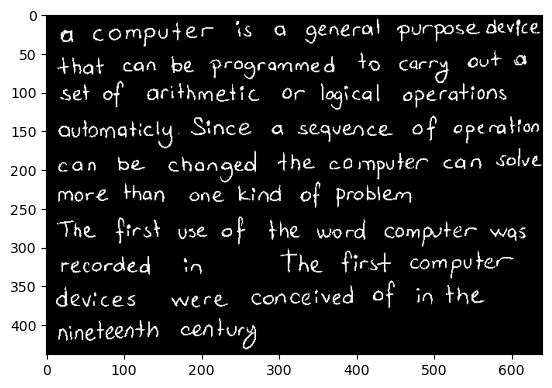

Average width of components: 11.631578947368421


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread("image_2_IAM.jpg", cv2.IMREAD_GRAYSCALE)

# Binarize the image
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary_image, cmap='gray')
plt.show()
# Find connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image)

# Calculate the average width of components
component_widths = stats[1:, cv2.CC_STAT_WIDTH]  # Exclude the background
average_width = np.mean(component_widths)
print(f"Average width of components: {average_width}")


In [31]:
binary_image.max()

255

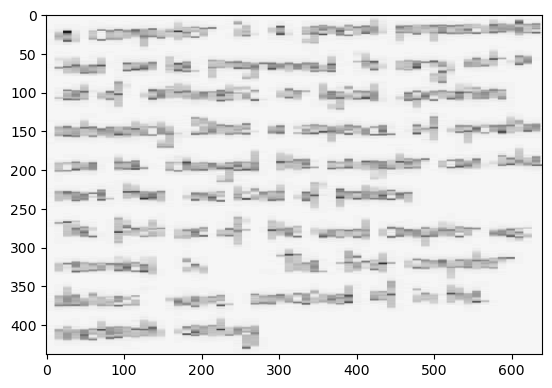

In [38]:
# Divide the image into vertical stripes
stripe_width = int(average_width)
height, width = image.shape
painted_image = image.copy()

for i in range(height):
    for start in range(0, width, stripe_width):
        end = min(start + stripe_width, width)
        stripe = image[i, start:end]

        # Paint the stripe by replacing pixel values with the average
        mean_value = np.mean(stripe)
        painted_image[i, start:end] = mean_value

plt.imshow(painted_image, cmap='gray')
plt.show()

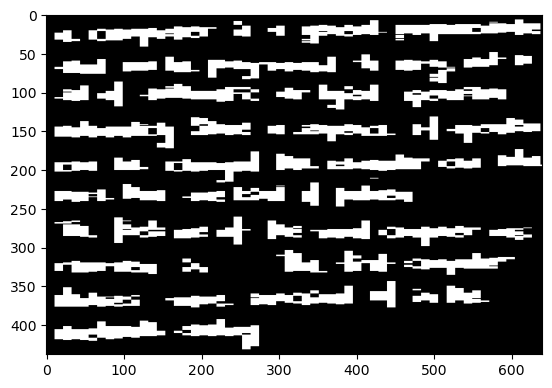

In [39]:
_, binary_p_image = cv2.threshold(painted_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(binary_p_image, cmap='gray')
plt.show()

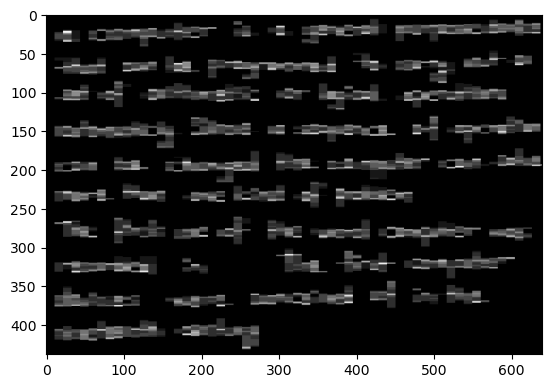

In [ ]:
# Smoothing with a morphological operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
smoothed_image = cv2.morphologyEx(painted_image, cv2.MORPH_CLOSE, kernel)

plt.imshow(smoothed_image, cmap='gray')
plt.show()

In [34]:
# Sum pixel values along columns to estimate gaps
vertical_projection = np.sum(smoothed_image, axis=0)
gaps = np.where(vertical_projection == 0)[0]
print(f"Estimated gaps: {gaps}")


Estimated gaps: [ 0  1  2  3  4  5  6  7  8  9 10]


In [37]:
vertical_projection.shape,image.shape

((640,), (438, 640))

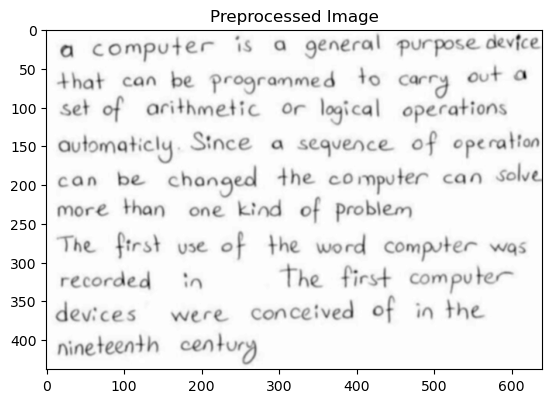

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image_2_IAM.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to grayscale and preprocess
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Display the preprocessed image
plt.imshow(blurred, cmap='gray')
plt.title("Preprocessed Image")
plt.show()


In [43]:
component_widths

array([  0, 640], dtype=int32)

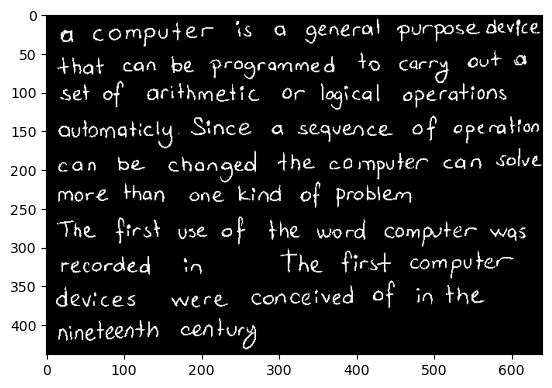

Average width of components: 11.631578947368421


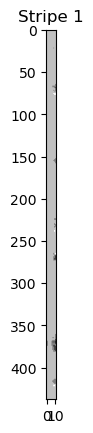

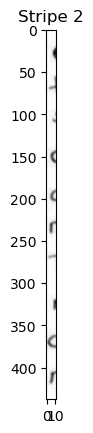

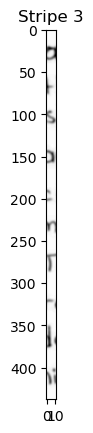

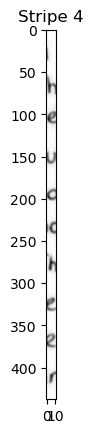

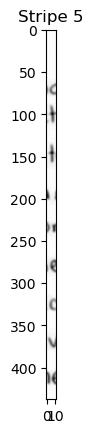

In [44]:
# Calculate connected components
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary_image, cmap='gray')
plt.show()
# Find connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image)

# Calculate the average width of components
component_widths = stats[1:, cv2.CC_STAT_WIDTH]  # Exclude the background
average_width = np.mean(component_widths)
print(f"Average width of components: {average_width}")

# num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(255 - blurred)

# Calculate average width of connected components
# component_widths = stats[:, cv2.CC_STAT_WIDTH]
# stripe_width = int(np.median(component_widths))
stripe_width = int(average_width)

# Split image into vertical stripes
height, width = blurred.shape
stripes = [blurred[:, i:i + stripe_width] for i in range(0, width, stripe_width)]

# Visualize a few stripes
for idx, stripe in enumerate(stripes[:5]):
    plt.imshow(stripe, cmap='gray')
    plt.title(f"Stripe {idx + 1}")
    plt.show()


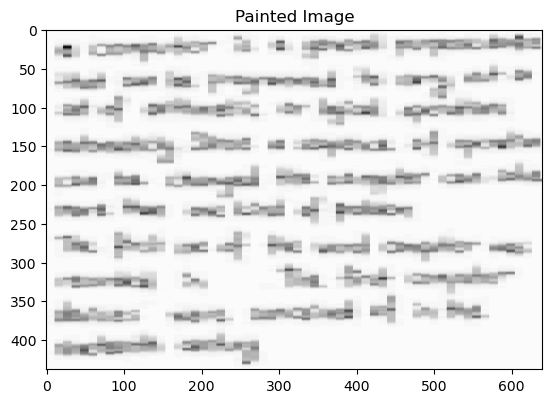

In [45]:
painted_image = np.zeros_like(blurred)

for i, stripe in enumerate(stripes):
    for row in range(stripe.shape[0]):
        avg_gray = np.mean(stripe[row, :])
        stripe[row, :] = avg_gray
    painted_image[:, i * stripe_width:(i + 1) * stripe_width] = stripe

# Display the painted image
plt.imshow(painted_image, cmap='gray')
plt.title("Painted Image")
plt.show()


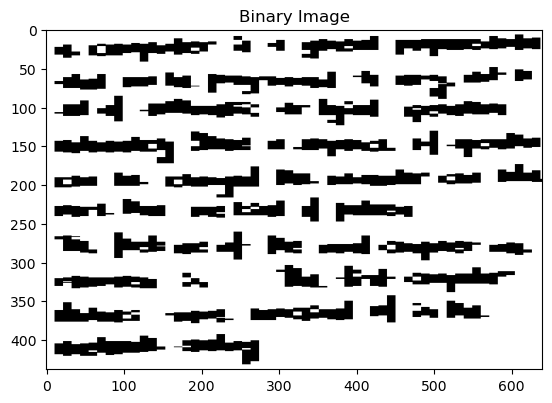

In [46]:
# Apply Otsu's thresholding
_, binary_image = cv2.threshold(painted_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.show()


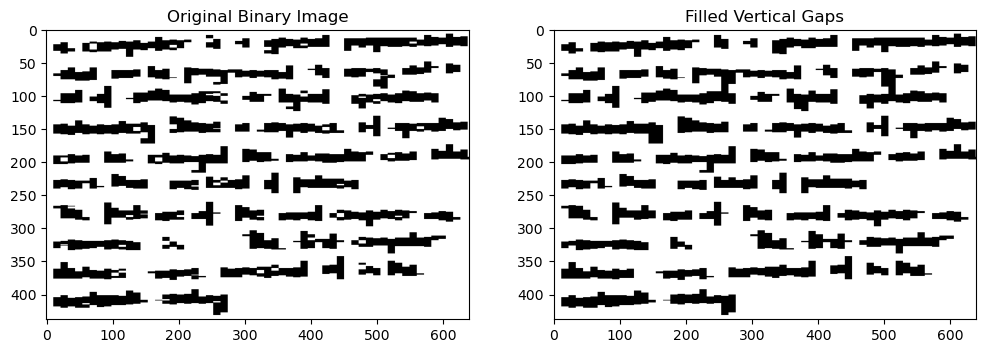

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image
# binary_image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Ensure the image is binary
# _, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

# Function to fill vertical gaps between black regions
def fill_vertical_gaps(image, gap_threshold):
    filled_image = image.copy()
    rows, cols = filled_image.shape

    for col in range(cols):
        start = None
        for row in range(rows):
            # Identify black regions (0) with white gaps (255)
            if filled_image[row, col] == 0:
                if start is not None:
                    # If a gap is detected between two black regions
                    gap_height = row - start - 1
                    if gap_height > 0 and gap_height <= gap_threshold:
                        # Fill the gap with black (0) if within the threshold
                        filled_image[start + 1:row, col] = 0
                start = row  # Update the start position

    return filled_image

# Define the vertical gap threshold
gap_threshold = 10  # Adjust based on your dataset

# Apply the vertical gap filling function
filled_image = fill_vertical_gaps(binary_image, gap_threshold)

# Display the original and filled images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Binary Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filled Vertical Gaps")
plt.imshow(filled_image, cmap='gray')
plt.show()


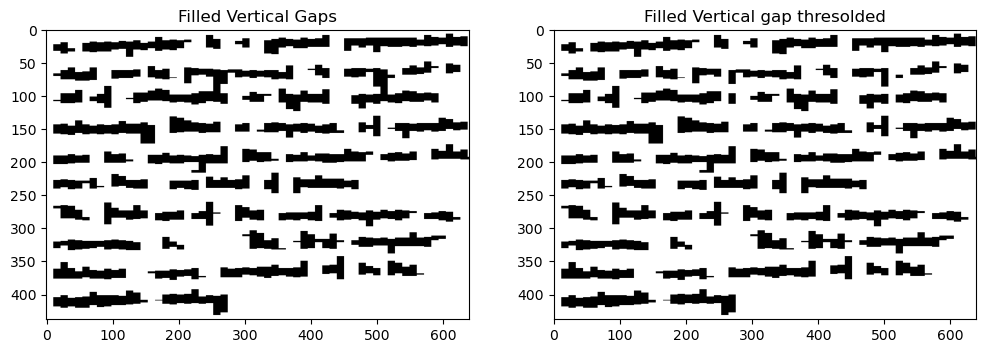

In [70]:
# algorithem which can remove the portion of black box or trim it if it's hight is more than thresold and
# width should be the strip size
threshold_width=4*stripe_width
sum_s = 1
filled_image_n=filled_image.copy()
for i in range(0, filled_image.shape[1], stripe_width):
    for j in range(0, filled_image.shape[0]-threshold_width):
        sum_s = np.sum(filled_image[j:j+threshold_width, i:i + stripe_width])
        if sum_s<=0:
            filled_image_n[j:j+threshold_width, i:i + stripe_width]=255
        
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Filled Vertical Gaps")
plt.imshow(filled_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filled Vertical gap thresolded")
plt.imshow(filled_image_n, cmap='gray')
plt.show()


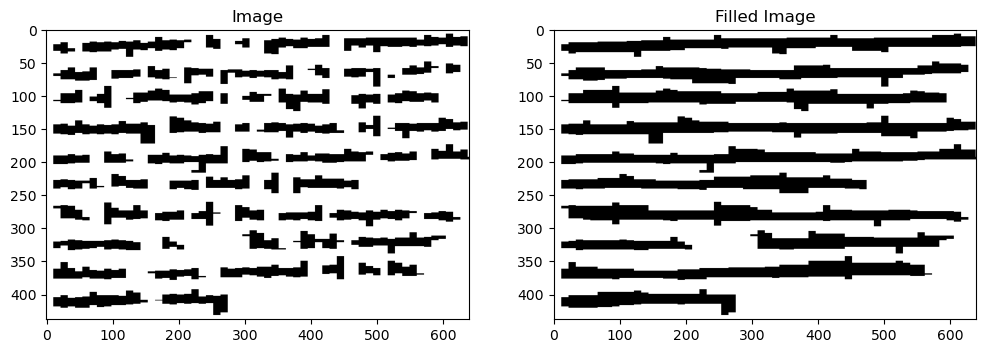

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image
# binary_image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Ensure it's a binary image
# _, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

# Function to fill white gaps between black regions
def fill_white_gaps(image, gap_threshold):
    filled_image = image.copy()
    rows, cols = filled_image.shape

    for row in range(rows):
        start = None
        for col in range(cols):
            # Identify black regions (0) with white gaps (255)
            if filled_image[row, col] == 0:
                if start is not None:
                    # If a gap is detected between two black regions
                    gap_width = col - start - 1
                    if gap_width > 0 and gap_width <= gap_threshold:
                        # Fill the gap with black (0) if within the threshold
                        filled_image[row, start + 1:col] = 0
                start = col  # Update the start position

    return filled_image

# Define the gap threshold
gap_threshold = stripe_width*4  # Adjust based on your dataset

# Apply the gap filling function
filled_image_n_n = fill_white_gaps(filled_image_n, gap_threshold)

# Display the original and filled images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(filled_image_n, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filled Image")
plt.imshow(filled_image_n_n, cmap='gray')
plt.show()


Ensure you have OpenCV with ximgproc module installed. Falling back to custom thinning.


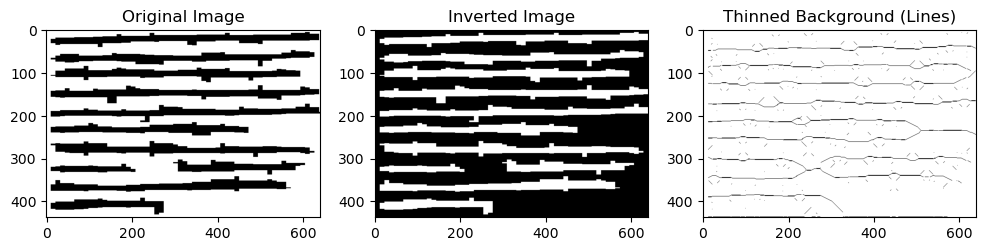

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
# image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Ensure the image is binary
# _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Invert the binary image to focus on the background
# inverted_image = cv2.bitwise_not(filled_image_n_n)

# Apply skeletonization (thinning) to the inverted image
# Ensure OpenCV's ximgproc module is available
try:
    skeleton = cv2.ximgproc.thinning(inverted_image, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)
except AttributeError:
    print("Ensure you have OpenCV with ximgproc module installed. Falling back to custom thinning.")

    # Custom thinning method (basic iterative approach)
    def skeletonize(img):
        skel = np.zeros_like(img)
        eroded = np.zeros_like(img)
        temp = np.zeros_like(img)

        while True:
            # Erode the image
            eroded = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)))
            temp = cv2.dilate(eroded, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)))
            temp = cv2.subtract(img, temp)
            skel = cv2.bitwise_or(skel, temp)
            img = eroded.copy()

            if cv2.countNonZero(img) == 0:
                break

        return skel

    skeleton = skeletonize(filled_image_n_n)

# Invert the result back to represent thinned background
thinned_background = cv2.bitwise_not(skeleton)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(filled_image_n_n, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Inverted Image")
plt.imshow(inverted_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Thinned Background (Lines)")
plt.imshow(thinned_background, cmap='gray')

plt.show()


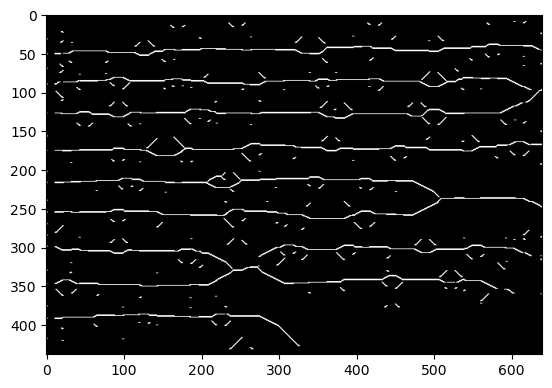

In [77]:
# Invert the image to make lines white and background black
inverted_image = cv2.bitwise_not(thinned_background)

# Define the horizontal Sobel-like filter
H = np.array([[1, 2, 1],
              [0, 0, 0],
              [-1, -2, -1]], dtype=np.float32)

# Apply the horizontal filter
filtered_image = cv2.filter2D(inverted_image, -1, H)

# Normalize and threshold the result
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
_, thresholded_image = cv2.threshold(filtered_image, 50, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_image, cmap='gray')